Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 

The attributes are as follows: 

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sb

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Company_Data.csv")
df.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
col_names=['ShelveLoc', 'Urban',  'US']

for col in col_names:
    
    print(df[col].value_counts())

In [ ]:
df.info()

In [ ]:
sb.countplot(x="ShelveLoc",data=df,palette="hls",hue="ShelveLoc")
plt.show()

In [ ]:
sb.countplot(x="Urban",data=df,palette="hls",hue="Urban")
plt.show()

In [ ]:
sb.countplot(x="US",data=df,palette="hls",hue="US")
plt.show()

In [ ]:
plt.hist(df.Sales, color="pink", edgecolor="black")
plt.title("Sales")
plt.show()


In [ ]:
plt.hist(df.Income, color="Brown", edgecolor="black")
plt.title("Income")
plt.show()



In [ ]:
plt.hist(df.CompPrice, color="red", edgecolor="black")
plt.title("CompPrice")
plt.show()



In [ ]:
plt.hist(df.Advertising, color="Blue", edgecolor="black")
plt.title("Advertising")
plt.show()


In [ ]:
plt.hist(df.Population, color="Blue", edgecolor="black")
plt.title("Population")
plt.show()


In [ ]:
plt.hist(df.Price, color="yellow", edgecolor="black")
plt.title("Price")
plt.show()


In [ ]:
plt.hist(df.Age, color="purple", edgecolor="black")
plt.title("Age")
plt.show()


In [ ]:
plt.hist(df.Education, color="red", edgecolor="black")
plt.title("Education")
plt.show()


In [4]:
df['Urban']=df['Urban'].apply(lambda x:0 if x=='no' else 1)
df['US']=df['US'].apply(lambda x:0 if x=='no' else 1)

In [5]:
def value_converter(v):
    m = ['Bad','Medium','Good']
    return m.index(v)

df['ShelveLoc']=df['ShelveLoc'].apply(lambda x:value_converter(x))
df.head(10)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,1
5,10.81,124,113,13,501,72,0,78,16,1,1
6,6.63,115,105,0,45,108,1,71,15,1,1
7,11.85,136,81,15,425,120,2,67,10,1,1
8,6.54,132,110,0,108,124,1,76,10,1,1
9,4.69,132,113,0,131,124,1,76,17,1,1


In [6]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [7]:
#  WE ARE HERE CONVERTING OUR Y INTO 2 CLASS OUTPUT

#so according to question here adding a column 0r feature as sales_quality have class 
# low = if sales is less than mean value 
# high = if sales is greater than mean value

sales_quality = [] 
for value in df["Sales"]: 
    if value <= 7.496325: 
        sales_quality.append("low") 
    
    else:
        sales_quality.append("high")
       
df["sales_quality"] = sales_quality    
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_quality
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,1,59,12,1,1,high
3,7.40,117,100,4,466,97,1,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,1,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1,high
396,6.14,139,23,3,37,120,1,55,11,1,1,low
397,7.41,162,26,12,368,159,1,40,18,1,1,low
398,5.94,100,79,7,284,95,0,50,12,1,1,low


In [8]:
df.drop(['Sales'],inplace = True, axis=1)
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_quality
0,138,73,11,276,120,0,42,17,1,1,high
1,111,48,16,260,83,2,65,10,1,1,high
2,113,35,10,269,80,1,59,12,1,1,high
3,117,100,4,466,97,1,55,14,1,1,low
4,141,64,3,340,128,0,38,13,1,1,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1,high
396,139,23,3,37,120,1,55,11,1,1,low
397,162,26,12,368,159,1,40,18,1,1,low
398,100,79,7,284,95,0,50,12,1,1,low


In [ ]:
#x = df.iloc[:,0:10]
#y = df.iloc[:,10]

In [9]:
colnames = list(df.columns)
x = colnames[:10]
y = colnames[10]

In [ ]:
x
#y

In [10]:
# Splitting data into training and testing data set

from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.2)

In [ ]:
#train
test

In [11]:
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state=0)

model.fit(train[x],train[y])


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [12]:
model.score(train[x],train[y])

0.76875

In [13]:
preds = model.predict(test[x]) # predicting on test data set 

[Text(334.8, 380.52, 'X[5] <= 1.5\nentropy = 1.0\nsamples = 320\nvalue = [160, 160]'),
 Text(167.4, 271.8, 'X[4] <= 126.5\nentropy = 0.972\nsamples = 249\nvalue = [100, 149]'),
 Text(83.7, 163.07999999999998, 'X[0] <= 125.5\nentropy = 0.998\nsamples = 170\nvalue = [90, 80]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.971\nsamples = 110\nvalue = [44, 66]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.784\nsamples = 60\nvalue = [46, 14]'),
 Text(251.10000000000002, 163.07999999999998, 'X[0] <= 134.5\nentropy = 0.548\nsamples = 79\nvalue = [10, 69]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.162\nsamples = 42\nvalue = [1, 41]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.8\nsamples = 37\nvalue = [9, 28]'),
 Text(502.20000000000005, 271.8, 'X[4] <= 135.0\nentropy = 0.622\nsamples = 71\nvalue = [60, 11]'),
 Text(418.5, 163.07999999999998, 'X[0] <= 116.5\nentropy = 0.219\nsamples = 57\nvalue = [55, 2]'),
 Text(376.65000000000003, 54.360000000000014, 'entropy = 0.

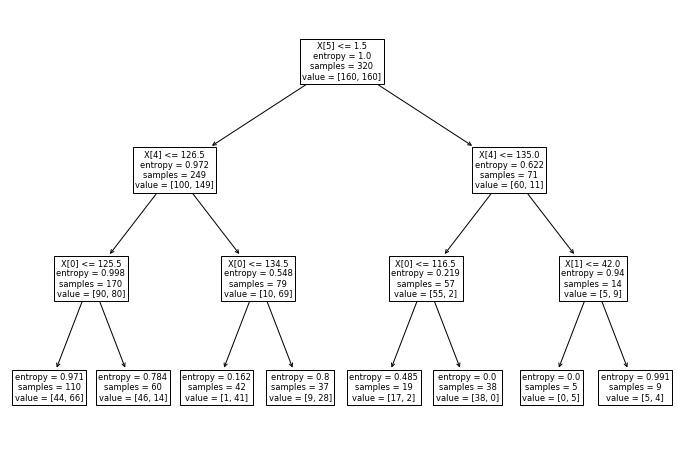

In [14]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(model.fit(train[x],train[y]))

In [15]:

pd.Series(preds).value_counts() # getting the count of each category 

pd.crosstab(test[y],preds) # getting the 2 way table to understand the correct and wrong predictions


col_0,high,low
sales_quality,,
high,22,17
low,8,33


In [16]:
# Accuracy 
np.mean(preds==test.sales_quality) 

0.6875

## Applying Boosting techniques for Better Accuracy

In [17]:
import xgboost as xgb
from sklearn.metrics import explained_variance_score


In [19]:
### Preparing XGB classifier 
xgb1 = xgb.XGBClassifier(n_estimators=2000,learning_rate=0.3)
xgb1.fit(train[x],train[y])
train_pred = xgb1.predict(train[x])


In [21]:
import numpy as np
train_acc = np.mean(train_pred==train[y]) # 90.94
print(train_acc)


1.0


In [22]:
test_pred = xgb1.predict(test[x])
test_acc = np.mean(test_pred==test[y]) #0.75
print(test_acc)

0.7875


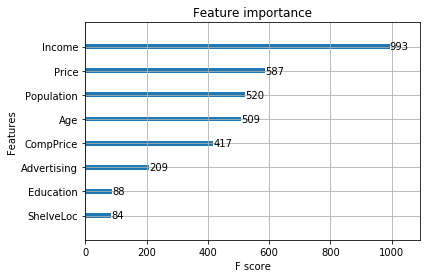

In [23]:
# Variable importance plot 
from xgboost import plot_importance
plot_importance(xgb1)